In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras import Model

### Types

In [3]:
tf.constant([3, 4, 22], dtype=tf.uint32)

<tf.Tensor: shape=(3,), dtype=uint32, numpy=array([ 3,  4, 22], dtype=uint32)>

In [4]:
tf.constant([2, 5, -4], dtype=tf.float32)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 2.,  5., -4.], dtype=float32)>

In [5]:
tf.constant(['2', 'hello'], dtype=tf.string)

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'2', b'hello'], dtype=object)>

### Tensors

In [6]:
#vactor tensor
tf.constant([3, 4, 50, 2, -2, 1.9])

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 3. ,  4. , 50. ,  2. , -2. ,  1.9], dtype=float32)>

In [7]:
#variable tensor
a = tf.Variable([[2, 3, 4], [-3, 1, 5]])

### Activation Functions

In [8]:
tf.nn.relu(np.array([[-1, 4, 6, -33], [4, -2, 3, -5]]))

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[0, 4, 6, 0],
       [4, 0, 3, 0]])>

In [9]:
tf.nn.sigmoid(tf.constant([3, 4, 56], dtype=tf.float32))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.95257413, 0.98201376, 1.        ], dtype=float32)>

### Layers

##### Dense

In [10]:
#build dense layer
dense_layer = tf.keras.layers.Dense(23, activation=tf.nn.relu)

In [11]:
dense_layer(tf.constant([[2, 3, 2]], dtype=tf.float32))

<tf.Tensor: shape=(1, 23), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 1.4389076 , 0.099823  ,
        0.05615234, 0.        , 0.        , 0.        , 0.        ,
        0.58903503, 0.        , 0.        , 0.        , 0.58325195,
        0.        , 0.6932373 , 0.        , 0.00854492, 0.        ,
        0.        , 0.        , 0.9540558 ]], dtype=float32)>

In [12]:
dense_layer.get_weights()

[array([[ 0.21727401,  0.05283308,  0.30324256,  0.04938298, -0.36793238,
          0.40067816,  0.04513228,  0.08047932,  0.37697577,  0.13336056,
          0.18653405,  0.20172614,  0.1412518 ,  0.40736616,  0.42422134,
          0.47154874,  0.3307048 , -0.3811177 , -0.22740626, -0.38747472,
          0.00972554, -0.04546335,  0.05531257],
        [-0.30294818, -0.35621306, -0.04950786,  0.44495642,  0.05702889,
         -0.46376225, -0.3556326 , -0.28690273, -0.44968492, -0.43239966,
          0.02906811, -0.2551548 , -0.36282867, -0.4161594 , -0.2794712 ,
         -0.35022837, -0.14487135, -0.1055066 ,  0.2441647 , -0.23253092,
         -0.07031167, -0.15113056,  0.02611023],
        [-0.03518751, -0.01118869, -0.39036083,  0.00247458,  0.33227354,
          0.3233248 ,  0.22022659,  0.0197593 , -0.30366585, -0.42909747,
          0.0644052 , -0.30541843, -0.30620116, -0.17109334,  0.2867399 ,
         -0.36115158,  0.23311907, -0.10808223, -0.1344868 ,  0.3093472 ,
         -0.05

##### Conv2D

In [13]:
img = cv2.imread('images/cat.jpg')
img = np.expand_dims(img, axis=0)
img = img.astype(np.float32)
img.shape

(1, 185, 273, 3)

In [14]:
layer_conv = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.relu)

In [15]:
layer2Img = layer_conv(img)
layer2Img.shape

TensorShape([1, 181, 269, 16])

In [16]:
layer_conv.get_weights()[0].shape

(5, 5, 3, 16)

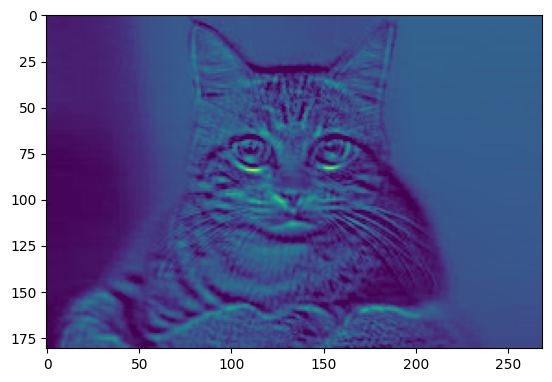

In [17]:
plt.imshow(layer2Img[0, :, :, 8])

##### Flatten

In [18]:
tensor = tf.constant([[1, 2, 3], [4, 5, 6], [33, 33, 22]])

# Create a Flatten layer
flatten_layer = tf.keras.layers.Flatten()

# Flatten the tensor using the Flatten layer
flattened_tensor = flatten_layer(tensor)

In [19]:
flattened_tensor

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [33, 33, 22]])>

##### MaxPooling2D

In [20]:
img = cv2.imread('images/cat.jpg')
img = np.expand_dims(img, axis=0)

In [21]:
img = img.astype(np.float32)
img.shape

(1, 185, 273, 3)

In [22]:
layer2Img = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(img)
layer2Img.shape

TensorShape([1, 92, 136, 3])

In [23]:
layer2Img[0].shape

TensorShape([92, 136, 3])

In [24]:
output = tf.cast(layer2Img[0], tf.int32) 

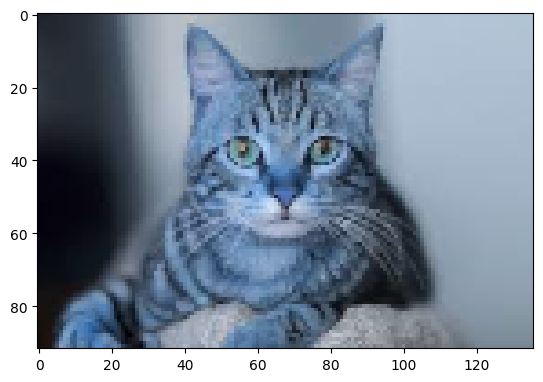

In [25]:
plt.imshow(output)

##### GlobalAveragePooling2D

In [26]:
img.shape

(1, 185, 273, 3)

In [27]:
avg = tf.keras.layers.GlobalAveragePooling2D()

In [28]:
avg(img)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 99.6635 , 116.13235, 135.05504]], dtype=float32)>

##### Dropout

In [29]:
layer = tf.keras.layers.Dropout(0.3)

In [30]:
input_data = tf.constant([[23, 54, 6, 34, 5], [23, 43, 54, 32, 3]], dtype=tf.float32)

In [31]:
output = layer(input_data, training=True)
output

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[32.857143 , 77.14286  ,  0.       , 48.57143  ,  7.1428576],
       [ 0.       , 61.428574 ,  0.       ,  0.       ,  4.285714 ]],
      dtype=float32)>

### change shape and type

In [32]:
tensor

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [33, 33, 22]])>

In [33]:
tensor.shape

TensorShape([3, 3])

In [34]:
tensor = tensor[:, :, tf.newaxis]
tensor.shape

TensorShape([3, 3, 1])

In [35]:
tensor = tf.reshape(tensor, shape=(3, 1, 3))
tensor.shape

TensorShape([3, 1, 3])

In [36]:
tf.cast(tensor, tf.float32)

<tf.Tensor: shape=(3, 1, 3), dtype=float32, numpy=
array([[[ 1.,  2.,  3.]],

       [[ 4.,  5.,  6.]],

       [[33., 33., 22.]]], dtype=float32)>

### Call model instance

In [37]:
model = tf.keras.models.Sequential()
model.add(Dense(16, activation='relu', input_shape=(10,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [38]:
model.compile(optimizer = 'adam')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                176       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [40]:
model(tf.random.normal(shape=(1, 10)))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.38951728]], dtype=float32)>

### Convert to numpy array

In [41]:
tensor.numpy()

array([[[ 1,  2,  3]],

       [[ 4,  5,  6]],

       [[33, 33, 22]]])

### Math operations

In [42]:
tf.math.add([2, 3], [2, 3])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6])>

In [43]:
tf.math.square([2, 3])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 9])>

In [44]:
tf.math.reduce_sum([2, 3, 4])

<tf.Tensor: shape=(), dtype=int32, numpy=9>

In [45]:
tf.math.multiply([[2, 3], [1, 3]], [[4, 2], [4, 5]])

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 8,  6],
       [ 4, 15]])>

### GPU acceleration

In [526]:
x = tf.random.uniform([10000, 10000])
y = tf.random.uniform([10000, 10000])

In [527]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [528]:
x.device

'/job:localhost/replica:0/task:0/device:GPU:0'

In [529]:
y.device

'/job:localhost/replica:0/task:0/device:GPU:0'

In [533]:
#watch the performance
for i in range(5000):
    result = tf.math.multiply(x, y)
    
result.shape

TensorShape([10000, 10000])

In [539]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(1000):
    tf.linalg.matmul(x, x)

  result = time.time()-start

  print("10 loops: {:0.2f}ms".format(1000*result))

# Force execution on CPU
print("On CPU:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# Force execution on GPU #0 if available
if tf.config.list_physical_devices("GPU"):
  print("On GPU:")
  with tf.device("GPU:0"): # Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

On CPU:
10 loops: 3840.86ms
On GPU:
10 loops: 60.18ms


### tf.data

### CustomLayer Class

##### Dense

In [56]:
dense = tf.keras.layers.Dense(16)

In [77]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(MyDenseLayer, self).__init__()
        self.units = units
        
    def build(self, input_shape_):
        self.input_shape_ = input_shape_
        self.kernel = self.add_weight('kernel', shape=(self.input_shape_[-1], self.units))
        self.bias = self.add_weight('bias', shape=(self.units,))
        
    def call(self, inputs):
        z = tf.matmul(inputs, self.kernel)
        output = tf.add(z, self.bias)
        return output

In [78]:
my_dense = MyDenseLayer(16)

In [79]:
my_dense.build(input_shape_=(8,))

In [82]:
my_dense.get_weights()

[array([[-2.7851462e-02,  3.1042457e-02, -7.8277469e-02,  3.8552809e-01,
         -3.6388361e-01,  2.3495150e-01, -2.0626998e-01,  3.6441445e-01,
          3.8730145e-01,  3.9071679e-02, -5.7197213e-02, -4.0484881e-01,
          5.7195425e-03, -8.7217212e-02, -1.3533676e-01, -4.3530583e-02],
        [ 2.1214569e-01,  1.6519165e-01,  4.9254787e-01,  1.4412832e-01,
         -1.2519097e-01,  2.6900852e-01, -1.1712074e-01, -4.0219104e-01,
          4.1381025e-01, -4.2869055e-01, -3.7553537e-01,  2.2548366e-01,
         -4.5359135e-04,  9.8182201e-02, -3.2005453e-01, -5.0628185e-02],
        [-3.2991028e-01,  4.9602640e-01, -2.8130174e-01, -4.0204382e-01,
         -1.2133050e-01,  1.3618958e-01,  2.0914125e-01, -5.7479978e-02,
          5.2927732e-03,  1.3859987e-01, -1.4074409e-01, -2.8528726e-01,
         -3.2981515e-02,  4.5808625e-01, -3.9762664e-01, -4.3311810e-01],
        [-1.4126515e-01, -3.9024639e-01, -3.7991929e-01,  3.4464407e-01,
         -2.4740207e-01, -1.5200996e-01, -8.5821

In [83]:
print([var.name for var in my_dense.trainable_variables])

['kernel:0', 'bias:0']


### model subclassing API